In [108]:
# นำเข้า Library ที่จำเป็น
import pandas as pd
import pydotplus

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image

In [109]:
# สร้าง DataFrame จากไฟล์ cancer.csv
df = pd.read_csv('./data/cancer.csv')
df


,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,CA level
0,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,F,N,Y,N,N,0.4,246,3.58,24,797.0,91.00,113,288,10.4,2
306,F,N,N,N,N,0.4,260,2.75,41,1166.0,70.00,82,231,10.8,2
307,F,N,N,N,N,1.7,434,3.35,39,1713.0,171.00,100,234,10.2,2
308,F,N,N,N,N,2.0,247,3.16,69,1050.0,117.00,88,335,10.5,2


In [110]:
# แปลงข้อมูล str ให้อยู่ในรูปแบบของตัวเลข(int)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Ascites'] = df['Ascites'].map({'Y': 1, 'N': 0, 'S': 2})
df['Hepatomegaly'] = df['Hepatomegaly'].map({'Y': 1, 'N': 0, 'S': 2})
df['Spiders'] = df['Spiders'].map({'Y': 1, 'N': 0, 'S': 2})
df['Edema'] = df['Edema'].map({'Y': 1, 'N': 0, 'S': 2})

In [111]:
X = df.drop(columns=['CA level']) # feature
y = df['CA level'] # class

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3) # แบ่งข้อมูลเป็น train และ test

In [113]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) # สร้างโมเดล
clf = clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) # ทำนายผล

print("Accuracy:", accuracy_score(y_test, y_pred)) # แสดงค่าความแม่นยำ

Accuracy: 0.5128205128205128


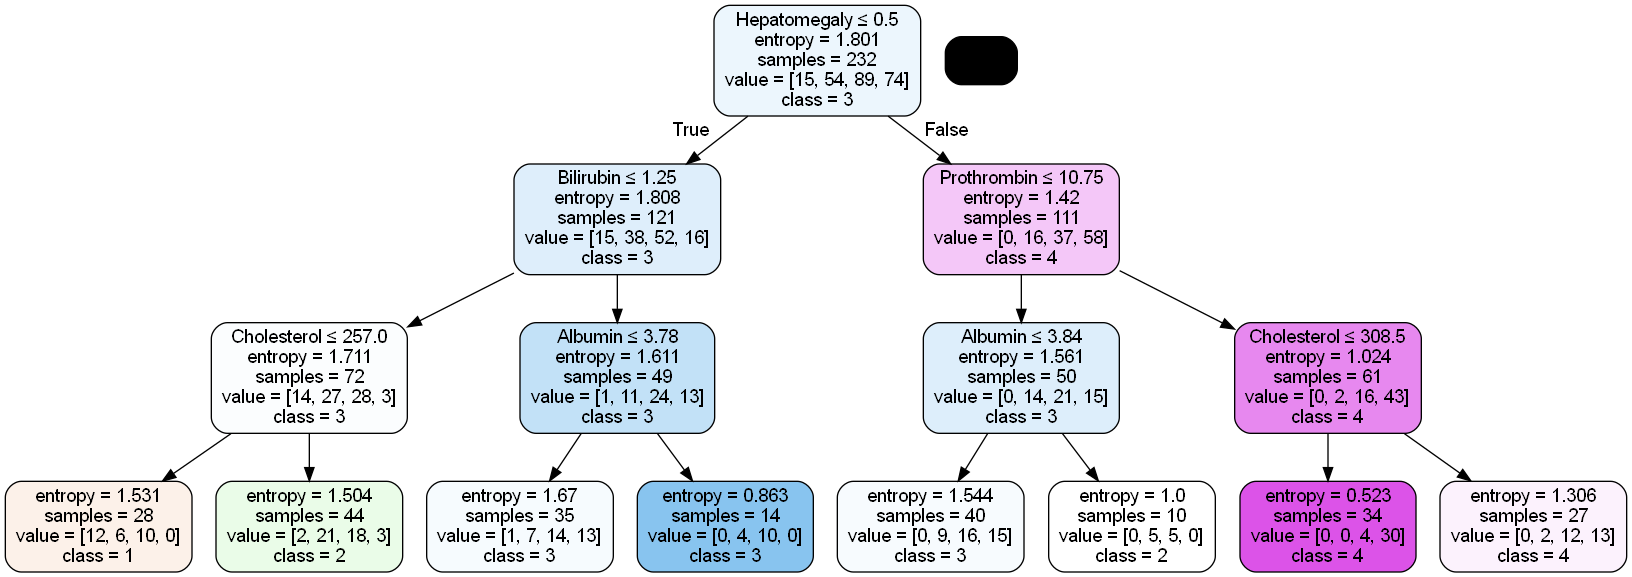

In [114]:
# แสดง Decision Tree
dot_data = export_graphviz(clf,out_file=None,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=[str(label) for label in clf.classes_])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('cancer.png')
Image(graph.create_png())